In [53]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
import os, sys

import numpy as np
from sklearn import metrics
from sklearn import cluster,neighbors
from sklearn import manifold, datasets

import sncolor as myc
from docluster import *
from matplotlib.pyplot import cm 

MainDir = os.path.abspath('../..')
print os.path.join(MainDir,'pipeline')
sys.path.append(os.path.join(MainDir,'pipeline'))

import CODE.reduction as pdr 

%matplotlib inline
# Next line to silence pyflakes. This import is needed.                                                                                                              
Axes3D

/Users/yabebal/My-Works/coin_crp2/codes/MLSNeSpectra/pipeline


mpl_toolkits.mplot3d.axes3d.Axes3D

In [10]:
#path1 = '../../empca_trained_coeff/sne.dat'
path_snname=os.path.join(MainDir,'data_all_types/spectra_data.dat')
path_spectra=os.path.join(MainDir,'data_all_types/derivatives.dat')
Xspectra = np.loadtxt(path_spectra)

#Deep Learning Data 

In [25]:
#path2='../../empca_trained_coeff/coefficients.dat'
nfr=20
#path_features=os.path.join(MainDir,'R/out_DeepLearning/derivatives_dl_'+str(nfr)+'components.dat')
path_features=os.path.join(MainDir,'data_all_types/out_DeepLearning.dat')
# read data                                                                                                                                                          
X = np.loadtxt(path_features)
figdir='figures/deepLearn'+str(nfr)+'/'

# PCA data

In [14]:
#path2='../../empca_trained_coeff/coefficients.dat'
path_features= '../../data_all_types/reduced_data_pca.dat'
#X = pdr.pca(Xd,n_components=10)
figdir='figures/pcapLearn/'

# Common analysis

In [26]:
path_labels= '../../data_all_types/labels.dat'

print 'loading data '+path_features
X = np.loadtxt(path_features)

label_maxima=np.loadtxt(path_labels)
indMaxima = np.where(label_maxima>0)[0]
print 'label_maxima:',label_maxima[0:10]
print 'indMaxima: ',indMaxima[0:10]

n_points=len(X[:,0])
n_features = len(X[0,:])
print 'Orig N samples, N_features:',n_points,n_features

X = X[indMaxima,:]
n_points=len(X[:,0])
n_features = len(X[0,:])
print 'N samples, N_features:',n_points,n_features

#'Branch'                                                                                                                                                            
sne_name = np.loadtxt(path_snname,dtype=str)
leg_type='Branch'
color,marks,cm_name = myc.load_colors(sne_name[:,0],type=leg_type)
print indMaxima[0:10]
color=[color[ii] for ii in indMaxima]
marks=[marks[ii] for ii in indMaxima]
n_clusters = len(cm_name['name'])

y=color

loading data /Users/yabebal/My-Works/coin_crp2/codes/MLSNeSpectra/data_all_types/out_DeepLearning.dat
label_maxima: [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
indMaxima:  [ 3  6 10 12 15 18 30 41 50 59]
Orig N samples, N_features: 3677 20
N samples, N_features: 486 20
[ 3  6 10 12 15 18 30 41 50 59]


In [13]:
sne_name.shape
len(label_maxima)
#print color[3]
#for i,entry in enumerate(sne_name[:,0]):
#    if i<10: print entry[2:] 

3677

Method Clustering method: KMeans
Estimated number of clusters: 4
Method Clustering method: KMeans
Estimated number of clusters: 5


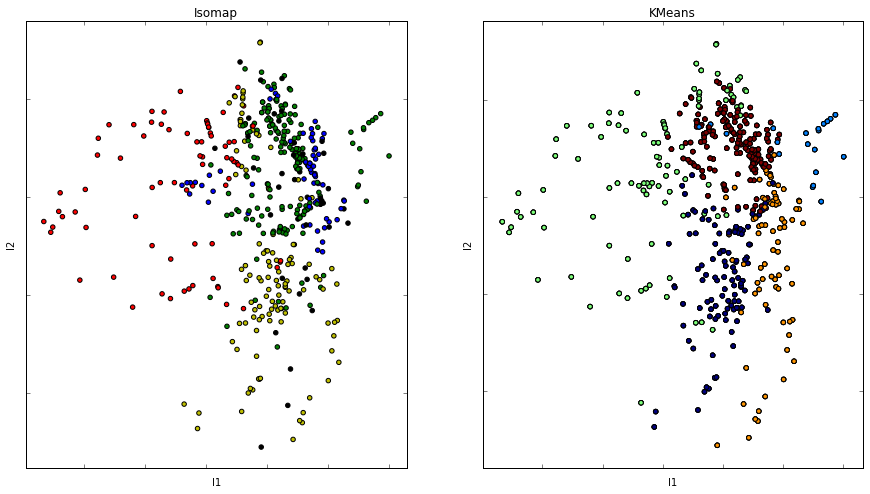

In [27]:
 #'plots_' + case + '/'                                                                                                                             
if not os.path.isdir(figdir):
    os.makedirs(figdir)


# drmethods=['Isomap','MDS','TSNE']                                                                                                                                  
# cmethods=['KMeans','AffinityPropagation','DBSCAN','AggC']                                                                                                          

drmethods=['Isomap']
cmethods=['KMeans']

niter=2000
sniter='2e3'
n_neighbors = 5 #nfriends                                                                                                                                            
n_components = 2#ndim #dimension 

for drname in drmethods:
    for cname in cmethods:

        case = drname+'_vs_'+cname+'_D'+str(n_components)

        Y = reduce_dim(drname,X,ndim=n_components)
        #plot dimension reduced data                                                                                                                                 
        fig = plt.figure(figsize=(15, 8))
        if n_components==3:
            ax = fig.add_subplot(121, projection='3d', elev=48, azim=134)
        if n_components==2:
            ax = fig.add_subplot(121)
        put_ax_onfig(n_components,ax,Y,color*10,mytit=drname)


        est, labels,nout_clusters_ = find_cluster(cname, X,ncluster=n_clusters,niter=2000)
        unique_val, counts = np.unique(labels, return_counts=True)
        #
        clusterDict = {}
        for ii,igrp,icnt in zip(range(len(counts)),unique_val,counts): 
            clusterDict[ii+1]={'index':np.where(labels==igrp),'count':icnt}
            
        #second plot from clustering                                                                                                                                 
        if n_components==3:
            ax = fig.add_subplot(122, projection='3d', elev=48, azim=134)
            ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=labels.astype(np.float))
        if n_components==2:
            ax = fig.add_subplot(122)
            ax.scatter(Y[:, 0], Y[:, 1], c=labels.astype(np.float))
        put_ax_onfig(n_components,ax,Y,labels,mytit=cname)

        est, labels,nout_clusters_ = find_cluster(cname, X,ncluster=5,niter=2000)
        #second plot from clustering                                                                                                                                 
        if n_components==3:
            ax = fig.add_subplot(122, projection='3d', elev=48, azim=134)
            ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=labels.astype(np.float))
        if n_components==2:
            ax = fig.add_subplot(122)
            ax.scatter(Y[:, 0], Y[:, 1], c=labels.astype(np.float))
        put_ax_onfig(n_components,ax,Y,labels,mytit=cname)

        #plt.show()                                                                                                                                                  
        plt.savefig(figdir+'/plot_'+case+'_'+leg_type+'_niter'+sniter+'.png')



#Given clusters compute which features are most important descriminators 

In [28]:
#first get the index of samples in different groups as a dict
for igrp in clusterDict.dict():
    cluster_grpIndex = clusterDict[igrp]['index'][0]
    mean_grp=Xspectra[cluster_grpIndex,:].mean(axis=0)
    max_grp=Xspectra[cluster_grpIndex,:].max(axis=0)
    color_grp=cm.rainbow(np.linspace(0,1,len(cluster_grpIndex)))
index_ftr = np.where(abs(mean_grp)-abs(max_grp)>=0)
print index_ftr, max_grp.shape, mean_grp.shape

len(cluster_grpIndex)

144

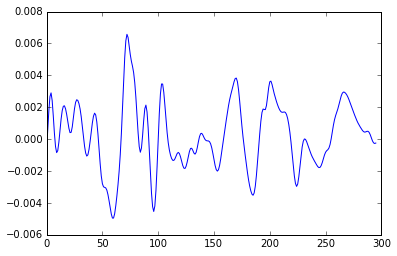

In [29]:
plt.plot(mean_grp)

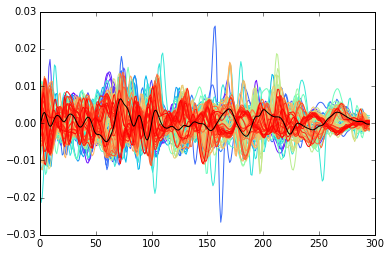

In [57]:
for i,c in zip(cluster_grpIndex,color_grp): plt.plot(Xspectra[i,:]-mean_grp,c=c)
plt.plot(mean_grp,c='k')

(array([224, 241, 242]),) (296,) (296,)


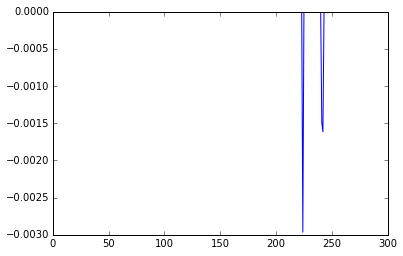

In [48]:
out_ftrs = max_grp[:]*0
out_ftrs[index_ftr]=mean_grp[index_ftr]
plt.plot(out_ftrs)